# Sri Lankan University Student Monthly Expenses Survey – Data Analysis

This notebook analyzes survey data collected from Sri Lankan university students regarding their monthly expenses.  
The aim is to identify **spending patterns**, **major expense categories**, and **factors influencing expenditure**.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Try common repo-relative paths
paths = [Path('../Data/test.csv'), Path('Data/test.csv'), Path('test.csv')]
csv_path = None
for p in paths:
    if p.exists():
        csv_path = p
        break
df = pd.read_csv(csv_path)
display(df.head())


,Timestamp,Which university are you currently enrolled in?,What is your Faculty?,What year are you currently studying in?,Are you?,What is your hometown?,What is your current living arrangement?,How much do you pay monthly for rent or accommodation?,"What is your average monthly expense for utilities (electricity, water, gas, internet, phone)?",How much do you typically spend on groceries per month?,...,What is your average monthly cost for printing and photocopying academic materials?,"How much do you spend monthly on personal care (salon, skincare, hygiene products)?",What is your average monthly expense for clothing and accessories?,Do you usually use the free medical services at the university?,"What are your average monthly medical expenses (doctor visits, medication, health insurance)? (Answer only if you responded “No” to the previous question.)",Are you a member of the gym or any sports club at your university ?,Do you currently pay for a gym or sports club membership ? (Answer only if you responded “No” to the previous question.),How much do you spend each month on gym memberships or sports activities? (Answer only if you responded “Yes” to the previous question.),"On average, what is your total monthly expenditure?","Do you feel that your current monthly expenses are manageable based on your income or financial support (e.g., family support, scholarships, part-time jobs)?"
0,7/22/2025 19:43,University of Ruhuna,Engineering,3rd Year,Male Student,Kandana,Boarding place,5000-7000,1000-1500,more than 2000,...,Less than 500,1000-2000,Less than 1000,Yes,Less than 1000,Yes,No,Less than 2000,More than 30000,"Yes, easily manageable"
1,7/22/2025 19:49,University of Moratuwa,IT faculty,2nd Year,Female Student,Ja ela,Living with family,NaN,NaN,NaN,...,Less than 500,1000-2000,2000-3000,No,2000-3000,No,Yes,Less than 2000,10000-20000,"Yes, easily manageable"
2,7/22/2025 19:51,University of Moratuwa,Faculty of Information Technology,2nd Year,Female Student,Kandana,Rented apartment/room,More than 11000,1500-2000,more than 2000,...,More than 1000,Less than 500,More than 3000,No,More than 3000,No,No,NaN,More than 30000,Somewhat manageable
3,7/22/2025 19:52,University of Colombo,UCSC,2nd Year,Female Student,Ragama,Living with family,NaN,NaN,NaN,...,More than 1000,More than 2000,More than 3000,No,Less than 1000,No,No,Less than 2000,More than 30000,"Yes, easily manageable"
4,7/22/2025 19:53,University of Peradeniya,Faculty of Science,2nd Year,Female Student,Galle,Boarding place,7000-9000,Less than 1000,1500-2000,...,Less than 500,1000-2000,2000-3000,No,1000-2000,No,Yes,Less than 2000,10000-20000,Not manageable – I struggle financially


## 📂 Data Loading and Preparation

In this step, we load the survey dataset (`test.csv`) into a Pandas DataFrame.  
Since the dataset was collected via a Google Form, the column names are long and descriptive.  
To make the analysis process easier, we rename them to shorter, more readable labels (e.g.,  
`Which university are you currently enrolled in?` → `university`).  

Finally, we display the first 20 rows to verify that the dataset has been loaded and renamed correctly.


In [2]:
import pandas as pd

# Read your CSV
df = pd.read_csv("../Data/test.csv")

# Column rename mapping
col_rename_map = {
    "Timestamp": "timestamp",
    "Which university are you currently enrolled in?": "university",
    "What is your Faculty?": "faculty",
    "What year are you currently studying in?": "year",
    "Are you?": "gender",
    "What is your hometown?": "hometown",
    "What is your current living arrangement?": "living_arrangement",
    "How much do you pay monthly for rent or accommodation? ": "rent",
    "What is your average monthly expense for utilities (electricity, water, gas, internet, phone)?": "utilities",
    "How much do you typically spend on groceries per month?": "groceries",
    "How much do you spend monthly on food from your university canteen?": "canteen_food",
    "How much do you spend monthly on food from outside (restaurants, cafes, delivery apps)?": "outside_food",
    "What is your average monthly transport expense (bus, train, tuk, ride-sharing, fuel)?": "transport",
    "How much do you spend monthly on stationery and academic supplies (books, notebooks, etc.)?": "stationery",
    "What is your average monthly cost for printing and photocopying academic materials?": "printing",
    "How much do you spend monthly on personal care (salon, skincare, hygiene products)?": "personal_care",
    "What is your average monthly expense for clothing and accessories?": "clothing",
    "Do you usually use the free medical services at the university?": "free_medical",
    "What are your average monthly medical expenses (doctor visits, medication, health insurance)? (Answer only if you responded â€œNoâ€ to the previous question.)": "medical_expenses",
    "Are you a member of the gym or any sports club at your university ?": "gym_member",
    "Do you currently pay for a gym or sports club membership ? (Answer only if you responded â€œNoâ€ to the previous question.)": "gym_paid",
    "How much do you spend each month on gym memberships or sports activities? (Answer only if you responded “Yes” to the previous question.)": "gym_cost",
    "On average, what is your total monthly expenditure?": "total_expenses",
    " Do you feel that your current monthly expenses are manageable based on your income or financial support (e.g., family support, scholarships, part-time jobs)?": "expenses_manageable",
    "What are your average monthly medical expenses (doctor visits, medication, health insurance)? (Answer only if you responded “No” to the previous question.)" : "medical_cost",
    "Do you currently pay for a gym or sports club membership ? (Answer only if you responded “No” to the previous question.)": "gym_no"
}

# Apply renaming
df.rename(columns=col_rename_map, inplace=True)
# columns_to_remove = ["timestamp", "university", "faculty", "year", "hometown", "expenses_manageable", "free_medical" , "gym_member" , "gym_paid","total_expenses" ]

# df.drop(columns=columns_to_remove, inplace=True, errors="ignore")

display(df.head(20))



,timestamp,university,faculty,year,gender,hometown,living_arrangement,rent,utilities,groceries,...,printing,personal_care,clothing,free_medical,medical_cost,gym_member,gym_no,gym_cost,total_expenses,expenses_manageable
0,7/22/2025 19:43,University of Ruhuna,Engineering,3rd Year,Male Student,Kandana,Boarding place,5000-7000,1000-1500,more than 2000,...,Less than 500,1000-2000,Less than 1000,Yes,Less than 1000,Yes,No,Less than 2000,More than 30000,"Yes, easily manageable"
1,7/22/2025 19:49,University of Moratuwa,IT faculty,2nd Year,Female Student,Ja ela,Living with family,NaN,NaN,NaN,...,Less than 500,1000-2000,2000-3000,No,2000-3000,No,Yes,Less than 2000,10000-20000,"Yes, easily manageable"
2,7/22/2025 19:51,University of Moratuwa,Faculty of Information Technology,2nd Year,Female Student,Kandana,Rented apartment/room,More than 11000,1500-2000,more than 2000,...,More than 1000,Less than 500,More than 3000,No,More than 3000,No,No,NaN,More than 30000,Somewhat manageable
3,7/22/2025 19:52,University of Colombo,UCSC,2nd Year,Female Student,Ragama,Living with family,NaN,NaN,NaN,...,More than 1000,More than 2000,More than 3000,No,Less than 1000,No,No,Less than 2000,More than 30000,"Yes, easily manageable"
4,7/22/2025 19:53,University of Peradeniya,Faculty of Science,2nd Year,Female Student,Galle,Boarding place,7000-9000,Less than 1000,1500-2000,...,Less than 500,1000-2000,2000-3000,No,1000-2000,No,Yes,Less than 2000,10000-20000,Not manageable – I struggle financially
5,7/22/2025 19:54,University of Ruhuna,Faculty of Engineering,3rd Year,Male Student,Kalutara,Boarding place,7000-9000,1000-1500,1500-2000,...,Less than 500,500-1000,1000-2000,Yes,NaN,No,No,NaN,20000-30000,"Yes, easily manageable"
6,7/22/2025 19:55,University of Sri Jayewardhanepura,Faculty of Computing,2nd Year,Male Student,Kandana,Boarding place,More than 11000,1000-1500,more than 2000,...,More than 1000,1000-2000,2000-3000,Yes,NaN,Yes,NaN,2000-3000,20000-30000,Not sure
7,7/22/2025 19:55,University of Sri Jayewardhanepura,Faculty of Computing,2nd Year,Female Student,Kandy,Rented apartment/room,9000-11000,1500-2000,more than 2000,...,500-750,500-1000,More than 3000,No,1000-2000,No,No,NaN,20000-30000,Not manageable – I struggle financially
8,7/22/2025 19:59,University of Kelaniya,Faculty of Science,2nd Year,Female Student,Wattala,Living with family,NaN,NaN,NaN,...,500-750,More than 2000,More than 3000,Yes,More than 3000,No,No,NaN,More than 30000,Not manageable – I struggle financially
9,7/22/2025 20:00,University of Sri Jayewardhanepura,Faculty Of Computing,2nd Year,Female Student,Ratnapura,Boarding place,7000-9000,Less than 1000,more than 2000,...,500-750,More than 2000,2000-3000,No,1000-2000,No,No,NaN,More than 30000,Not manageable – I struggle financially


## 🧹 Removing Unnecessary Columns

Some columns in the dataset are not directly needed for our analysis, such as demographic information  
(`timestamp`, `university`, `faculty`, `year`, `hometown`) and certain survey-related responses  
(`expenses_manageable`, `free_medical`, `gym_member`, `gym_paid`, `gym_no`).  

We drop these columns to keep only the essential expense-related data, making the dataset cleaner  
and easier to analyze. Finally, we display the first 20 rows of the updated DataFrame to confirm  
that the columns were removed successfully.

In [3]:
columns_to_remove = ["timestamp", "university", "faculty", "year", "hometown", "expenses_manageable", "free_medical" , "gym_member" , "gym_paid","gym_no" ]

df.drop(columns=columns_to_remove, inplace=True, errors="ignore")

# Show updated columns
display(df.head(20))





,gender,living_arrangement,rent,utilities,groceries,canteen_food,outside_food,transport,stationery,printing,personal_care,clothing,medical_cost,gym_cost,total_expenses
0,Male Student,Boarding place,5000-7000,1000-1500,more than 2000,Less than 5000,More than 10000,Less than 2000,Less than 250,Less than 500,1000-2000,Less than 1000,Less than 1000,Less than 2000,More than 30000
1,Female Student,Living with family,NaN,NaN,NaN,5000-7500,7500-10000,2000-3000,250-500,Less than 500,1000-2000,2000-3000,2000-3000,Less than 2000,10000-20000
2,Female Student,Rented apartment/room,More than 11000,1500-2000,more than 2000,7500-10000,7500-10000,More than 4000,500-750,More than 1000,Less than 500,More than 3000,More than 3000,NaN,More than 30000
3,Female Student,Living with family,NaN,NaN,NaN,Less than 5000,Less than 5000,3000-4000,More than 750,More than 1000,More than 2000,More than 3000,Less than 1000,Less than 2000,More than 30000
4,Female Student,Boarding place,7000-9000,Less than 1000,1500-2000,5000-7500,7500-10000,2000-3000,More than 750,Less than 500,1000-2000,2000-3000,1000-2000,Less than 2000,10000-20000
5,Male Student,Boarding place,7000-9000,1000-1500,1500-2000,More then 10000,Less than 5000,2000-3000,250-500,Less than 500,500-1000,1000-2000,NaN,NaN,20000-30000
6,Male Student,Boarding place,More than 11000,1000-1500,more than 2000,Less than 5000,5000-7500,More than 4000,More than 750,More than 1000,1000-2000,2000-3000,NaN,2000-3000,20000-30000
7,Female Student,Rented apartment/room,9000-11000,1500-2000,more than 2000,Less than 5000,More than 10000,More than 4000,500-750,500-750,500-1000,More than 3000,1000-2000,NaN,20000-30000
8,Female Student,Living with family,NaN,NaN,NaN,7500-10000,More than 10000,More than 4000,More than 750,500-750,More than 2000,More than 3000,More than 3000,NaN,More than 30000
9,Female Student,Boarding place,7000-9000,Less than 1000,more than 2000,7500-10000,More than 10000,More than 4000,More than 750,500-750,More than 2000,2000-3000,1000-2000,NaN,More than 30000


## 🏠 Living Arrangement Distribution

We analyze the **current living arrangements** of students (e.g., boarding place, rented room, hostel, or living with family).  
A bar chart is plotted to show how many students fall into each category.  
This helps us understand the most common living situations among Sri Lankan university students.

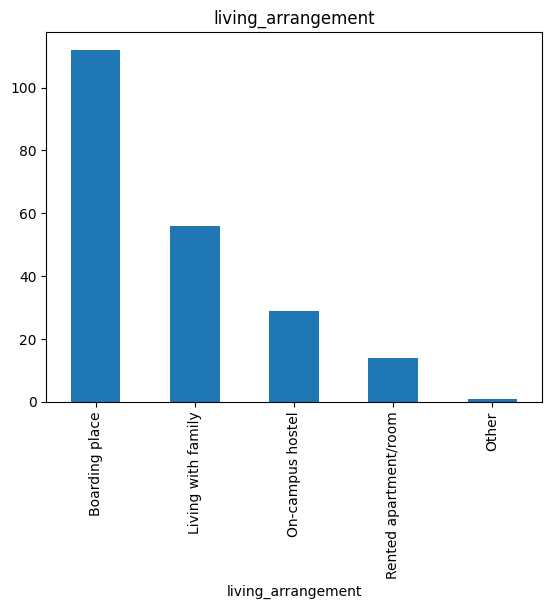

In [4]:
import matplotlib.pyplot as plt

df["living_arrangement"].value_counts().plot(kind="bar")
plt.title("living_arrangement")
plt.show()

## 🚍 Monthly Transport Expense Distribution

We examine how much students typically spend on **transportation** each month  
(bus, train, tuk, ride-sharing, fuel, etc.).  

A bar chart is used to visualize the frequency of different spending ranges,  
helping us identify common transport cost levels among students.


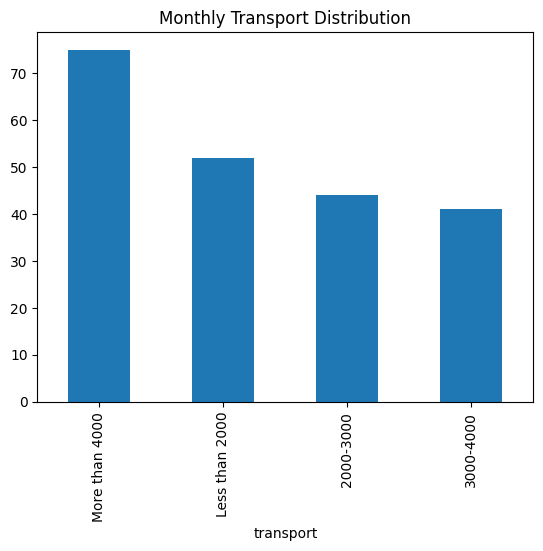

In [5]:
import matplotlib.pyplot as plt

df["transport"].value_counts().plot(kind="bar")
plt.title("Monthly Transport Distribution")
plt.show()


## 🏡 Monthly Rent Distribution

We analyze how much students spend on **rent or accommodation** each month.  
A bar chart is plotted to show the distribution of rental costs among students,  
which helps us understand the financial burden of accommodation for university students.


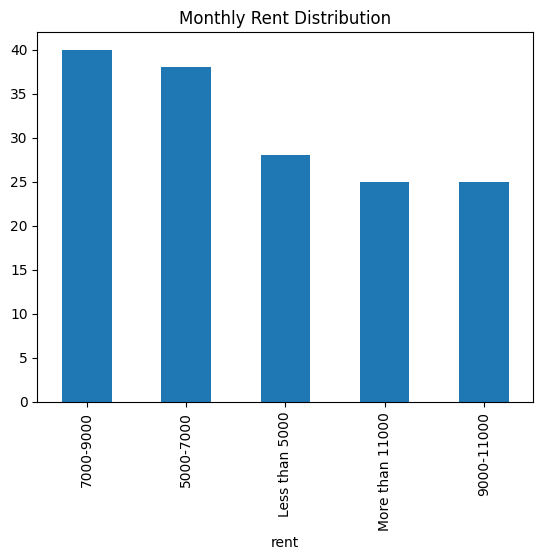

In [7]:
import matplotlib.pyplot as plt

df["rent"].value_counts().plot(kind="bar")
plt.title("Monthly Rent Distribution")
plt.show()